# Lesson 2: Tensor Products and Entanglement 

_course: quantum cryptography for beginners
<br>date: 1 september 2024
<br>author: burton rosenberg_

---

**This lesson discuses,**

- Tensor products
- Entanglement

Included in this is some quiskit/python/jupyter examples, and the quiskit documentation.



In [1]:
import qiskit
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector, Operator, Pauli 
from qiskit.visualization import plot_bloch_multivector, plot_bloch_vector
from IPython.display import display, Math, HTML
import time, math

print(f'\nqiskit version: {qiskit.version.get_version_info()}\n')


qiskit version: 1.1.2



### The Tensor and Kronecker products

The space of each qubit are combined into systems of qubits through the *tensor product*. The tensor product is almost the product space of its subspaces, but constrained by bilinearity. Given two qubits spaces considered as the cartesian product   $Q\times Q $, the combined system 
$Q\otimes Q$ is provided by,

$$
\begin{matrix}
Q,\,Q & \longrightarrow & Q\times Q \\
 & \searrow & \Big\downarrow\\
 && Q\otimes Q
\end{matrix}
$$
where the downarrow is provided by the bilinearity relations,
$$
\begin{array}{rrcl}
\text{commutes with addition on the right:} & a\otimes (b+c) &=& a\otimes b\, + \, a\otimes c \\
 \text{commutes with addition on the left:}&(a + b) \otimes c &=& a\otimes c\, + \, b\otimes c\\
\text{commutes with scalars:}&(\lambda \,a )\otimes b &=& \lambda\, (a\otimes b) = a\otimes(\lambda\,c)
\end{array}
$$
In particular, we have the formula for the _Kronecker product_,
$$
\begin{array}{ccl}
Q \times Q & \rightarrow & Q\otimes Q\\
 \sum_i \alpha_i |i\rangle, \,\sum_j \beta_j |j\rangle & \mapsto & \sum_{i,j} \,\alpha_i\,\beta_j\, |i\rangle\otimes |j\rangle
\end{array}
$$
where every $|i\rangle\otimes |j\rangle$ is a basis element in the space $Q\otimes Q$.

Here is the formula applied to the two qubit state $|0\rangle\otimes |0\rangle$, which is also written as $|0\rangle|0\rangle$
and as $|00\rangle$,
\begin{eqnarray*}
|00\rangle 
&=& \begin{pmatrix} 1\\0\end{pmatrix} \,\otimes\,  \begin{pmatrix} 1\\0\end{pmatrix} \\
&=&  \begin{pmatrix} 1 \begin{pmatrix}1\\0\end{pmatrix}\\0 \begin{pmatrix} 1\\0\end{pmatrix}\end{pmatrix}
=\begin{pmatrix} 1 \\0\\0\\0\end{pmatrix}
\end{eqnarray*}

&starf;_You will be asked in the exercises to multiply out the other three cases, $|01\rangle, |10\rangle$ and $|11\rangle$._

There is the seriously interesting formula, 
$$
\langle a\otimes b | c\otimes d\rangle = \langle a|c\rangle\,\langle b|d\rangle
$$
which specializes to,
$$
\langle a\otimes b | a\otimes b\rangle = \langle a|a\rangle\,\langle b|b\rangle
$$
so that the tensor produce of unit vectors is a unit vector (in the tensor product space).

&starf;_You will be asked in the exercises to prove this formula._


In [2]:
display(HTML('<br><h3>Tensor of Basis States</h3>'))
qc_0 = QuantumCircuit(1)
qc_1 = QuantumCircuit(1)
qc_1.x(0)
sv = [ Statevector(qc_0), Statevector(qc_1)]
for i in range(2):
    for j in range(2):
        t = sv[j].expand(sv[i]).draw('text')
        s = Math(rf'|{i}\rangle\otimes|{j}\rangle  = {t}')
        display(s)
print()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### The Tensor products of operators

Given unitary matrices, $N$ and $M$, define the unitary matrix $N\oplus M$ by 
$$
Nq\otimes Mv = (N\otimes M)(q\otimes v).
$$
This means that given the states of the two qubits, $q$ and $v$, there is a resulting 
state in the tensor product space resulting in,
- applying $N$ to $q$, $M$ to $v$, and mapping by the tensor map of states
- or applying the tensor map of operators $N\otimes M$ to the tensor map of states $q\otimes v$,
and these two paths are equivalent,
$$
\begin{array}{ccc}
q,\,v & \longrightarrow & q\otimes v \\
 \Big\downarrow  & 
\circlearrowright & \Big\downarrow\\
 Nq,\, Mv & \longrightarrow  & (N\otimes M)(q\otimes v) 
\end{array}
$$

This also can be computed by the Kronecker product.

In [8]:
display(HTML('<br><h3>Tensor of Operators</h3>'))

qc = QuantumCircuit(2)
qc.x(0)
qc.x(1)
op_xx = Operator(qc)
qc = QuantumCircuit(1)
qc.x(0)
op_x = Operator(qc)
display(Math(rf"X \otimes X = {op_x.draw('latex_source')} \otimes {op_x.draw('latex_source')} = {op_xx.draw('latex_source')}"))

qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)
op_hh = Operator(qc)
sv_hh = Statevector(qc)

qc = QuantumCircuit(1)
qc.h(0)
op_h = Operator(qc)

display(Math(rf"H \otimes H = {op_h.draw('latex_source')} \otimes {op_h.draw('latex_source')} = {op_hh.draw('latex_source')}"))
display(HTML(rf"<p><h4>Walsh-Hamadard transform</h4>"))
display(Math(rf"(H \otimes H) \,|00\rangle = {sv_hh.draw('latex_source')}"))

qc = QuantumCircuit(2)
qc.x(0)
qc.h(0)
qc.h(1)
sv_hh = Statevector(qc)
display(Math(rf"(H \otimes H) \,|01\rangle = {sv_hh.draw('latex_source')}"))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Adjoint Spaces and Controled Gates

The tensoring of a state space can continue to any finite number of qubits as $Q\otimes Q\otimes ... \otimes Q = Q^{\otimes n}$, or if I don't care about the dimension, $Q^\otimes$, or just $Q$, suppressing all concern for the number of qubits in the space.

The space $Q$ pairs with an *adjoint space* $Q^*$ (associate with the Hermian transpose) of linear functions from $Q$ to the base field $\mathbb{C}$,
$$
\begin{array}{ccc}
Q^* \times Q& \longrightarrow &\mathbb{C}\\
\langle s | q \rangle & \mapsto & c
\end{array}
$$
Any state $|q\rangle\in Q$ has an adjoint $\langle q | \in Q^*$ such that $\langle q | q \rangle = 1$. The bra $\langle q|$ also defines a space of states orthogonal to $|q\rangle$, those $|q'\rangle$ such that $\langle q|q'\rangle = 0$.

The inner product defines length and ortogonaly of states, with the important evalutions for the the computational basis,
$$
 |a\rangle\langle b | = \begin{cases} 1 & a=b\\
 0 & a\not = b
 \end{cases}, \qquad a,b \in \{\,0,1\,\}
$$

An operator can be formed evaluating on an adjoint, and applying the scalar result to a state. For $M=|a\rangle\langle b|$,
$$
M \,|q\rangle = |a\rangle\,\,\langle b|q\rangle = (\langle b|q\rangle)\,\,a\
$$
The two operators $|0\rangle\langle 0|$ and $|1\rangle\langle 1|$ can be used as selectors on one qubit in order to apply one or not apply  a gate on a second qubit. The _controlled not_ is defined in this way,
$$
{}^{(\neg)}X = | 0\rangle\langle 0| \otimes \mathbb{I} + |1\rangle\langle 1| \otimes X
$$
The action of this gate on $|10\rangle$ is,
\begin{eqnarray*}
{}^{(\neg)}X\,|10\rangle &=& | 0\rangle\langle 0|1\rangle \otimes \mathbb{I}|0\rangle + |1\rangle\langle 1|1\rangle \otimes X|0\rangle\\
&=& 0\,(|0\rangle\otimes |0\rangle)+1\,(|1\rangle\otimes|1\rangle) = |11\rangle
\end{eqnarray*}

&starf;_You will be asked in the exercises to multiply out the other three cases, $|01\rangle, |10\rangle$ and $|11\rangle$._

In [4]:
display(HTML('<br><h3>CNOT Gate</h3>'))

op_X = Operator(Pauli('X'))
op_I = Operator(Pauli('I'))

zero_zero = Operator([[1,0],[0,0]])
one_one = Operator([[0,0],[0,1]])
cnot = zero_zero.tensor(op_I)+one_one.tensor(op_X)

display(Math(r"{}^{(\neg)}X = | 0\rangle\langle 0| \otimes \mathbb{I} + |1\rangle\langle 1| \otimes X = "
             +rf"{zero_zero.draw('latex_source')} \otimes {op_I.draw('latex_source')} +{one_one.draw('latex_source')} \otimes {op_X.draw('latex_source')}  = {cnot.draw('latex_source')}"))


<IPython.core.display.Math object>

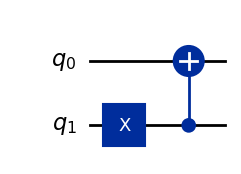

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [5]:

display(HTML('<br><h3>Circuit diagram to test on 01</h3>'))
qc = QuantumCircuit(2)
qc.x(1)
sv_in = Statevector(qc)
qc.cx(1,0)
sv_out = Statevector(qc)
display(qc.draw('mpl'))
ti = r"\text{input: }"
to = r"\text{output: }"
display(Math(rf"{ti}{sv_in.draw('latex_source')}"))
display(Math(rf"{to}{sv_out.draw('latex_source')}"))



### The Bell State and entanglement

The Hadamard gate puts a qubit in superposition. Using this superposed qubit as the control to a Pauli X operator puts two qubits in a correlated superposition of both zero or both one. 
$$
\Phi^+ = \frac{\sqrt{2}}{2} |00\rangle+\frac{\sqrt{2}}{2} |11\rangle
$$
There are three other Bell states,
\begin{eqnarray*}
\Phi^- & =& \frac{\sqrt{2}}{2} |00\rangle-\frac{\sqrt{2}}{2} |11\rangle \\
\Psi^+&=& \frac{\sqrt{2}}{2} |01\rangle+\frac{\sqrt{2}}{2} |10\rangle \\
\Psi^-&=& \frac{\sqrt{2}}{2} |01\rangle-\frac{\sqrt{2}}{2} |10\rangle
\end{eqnarray*}
What is significant about these states is that they cannot be written as a tensor product of two qubit states. They are not
in the image of the tensor map from pairs of states to tensor products of states. Such states are called _entangled states_. 

A state being entangled does not depend on the basis. If we do a change of basis to a Bell state we will still have an
entangled state. Consider a change to the X basis, governed by the change of basis equations,
$$
\begin{eqnarray*}
\sqrt{2}\, |0\rangle &=& |+\rangle + |-\rangle\\
\sqrt{2}\, |1\rangle &=& |+\rangle - |-\rangle\\
\end{eqnarray*}
$$
so
$$
\begin{eqnarray*}
2\sqrt{2}\,\Phi^+ &=& 2\, |00\rangle+2\, |11\rangle\\
&=& (|+\rangle + |-\rangle)^{\otimes 2} + (|+\rangle - |-\rangle)^{\otimes 2} \\
&=& |++\rangle + |+-\rangle + |-+\rangle + |--\rangle +|++\rangle - |+-\rangle - |-+\rangle + |--\rangle\\
&=& 2 ( |++\rangle +  |--\rangle)
\end{eqnarray*}
$$
therefore,
$$
\Phi^+ = \frac{\sqrt{2}}{2} |++\rangle+\frac{\sqrt{2}}{2} |--\rangle
$$

The consequence is that the qubits are not independent. If we measure on the Z basis, measuring one qubit makes the state of the other certain. We have show, that this is also true in the Y basis. 


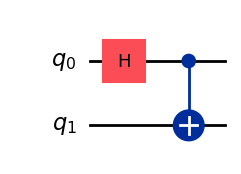

<IPython.core.display.Latex object>

In [10]:
display(HTML("<h3>Bell State</h3>"))

qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
display(qc.draw('mpl'))
sv = Statevector(qc)
display(sv.draw('latex'))